In [1]:
import cv2
# Функция предобработки изображения
def preprocess_image(image_path, save_steps=False):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise Exception(f"Image not found at {image_path}")
    cv2.imshow('Original Image',img)
    cv2.waitKey(0)

    # Бинаризация
    _, binary_img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    if save_steps:
        cv2.imwrite('binary_image.png', binary_img)
        cv2.imshow('Binary Image', binary_img)
        cv2.waitKey(0)

    # Размытие
    blurred_img = cv2.GaussianBlur(binary_img, (5, 5), 0)
    if save_steps:
        cv2.imwrite('blurred_image.png', blurred_img)
        cv2.imshow('Blurred Image', blurred_img)
        cv2.waitKey(0)
    
    return blurred_img

# Функция сопоставления шаблона
def match_template(image, template, save_steps=False):
    result = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    
    if save_steps:
        heat_map = cv2.normalize(result, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
        cv2.imwrite('match_heatmap.png', heat_map)
        cv2.imshow('Matching Heatmap', heat_map)
        cv2.waitKey(0)

    if max_val > 0.8:
        return True, max_loc
    return False, None

# Функция для локализации шаблона на изделии
def locate_pattern(image_path, template_path, save_steps=False):
    img = preprocess_image(image_path, save_steps=save_steps)
    template = preprocess_image(template_path, save_steps=save_steps)
    match, location = match_template(img, template, save_steps=save_steps)

    if match:
        top_left = location
        bottom_right = (top_left[0] + template.shape[1], top_left[1] + template.shape[0])
        marked_img = cv2.rectangle(img, top_left, bottom_right, 255, 2)
        cv2.imwrite('result_image.png', marked_img)
        cv2.imshow("Match Found", marked_img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        print("No Match Found")
        cv2.imshow("No Match Found", img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

In [2]:
locate_pattern('main_photo.jpg', 'traf.jpg')

2024-05-03 00:11:23.683 Python[53111:1035931] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


No Match Found


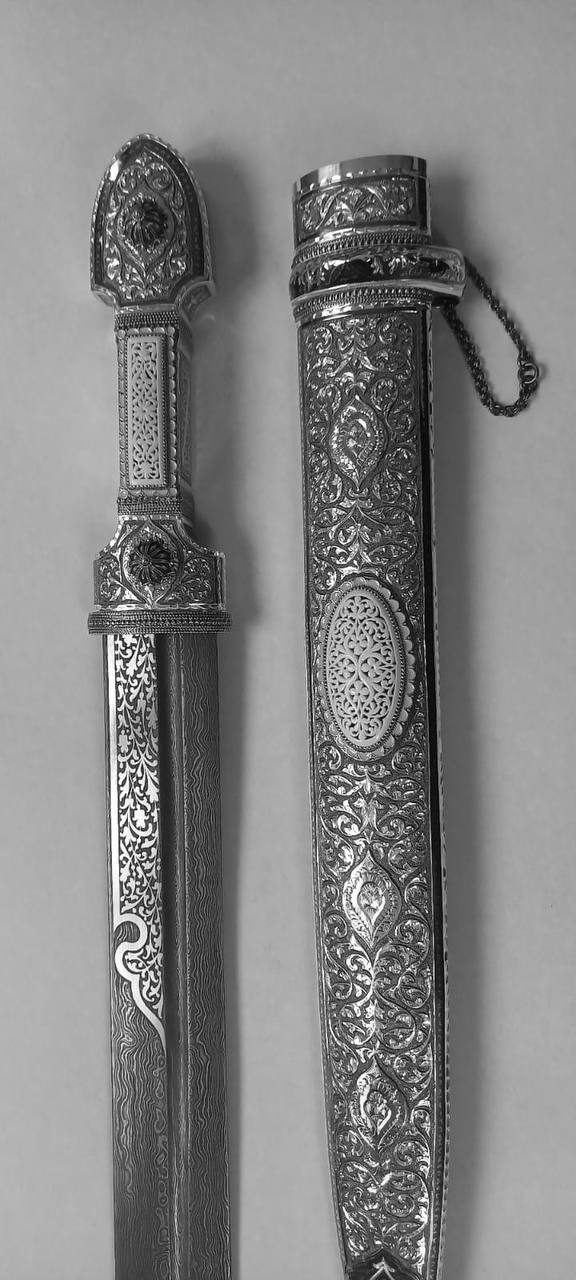

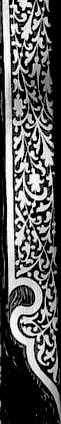

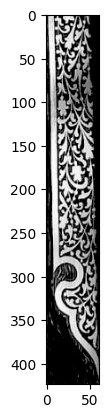

In [3]:
import cv2
from PIL import Image, ImageChops
import numpy as np
from matplotlib import pyplot as plt

image_1=cv2.imread('main_photo.jpg')
gray_image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY) #Переведем в черно-белый формат
display(Image.fromarray(gray_image_1))
image_2=cv2.imread('traf.jpg')
gray_image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY) #Переведем в черно-белый формат
gray_image_2 = cv2.bitwise_not(gray_image_2)
display(Image.fromarray(gray_image_2))

w, h = gray_image_1.shape[::-1]
result = cv2.matchTemplate(gray_image_2, gray_image_1, cv2.TM_CCOEFF_NORMED)
loc = np.where(result >= 0.5)

for pt in zip(*loc[::-1]):
       cv2.rectangle(gray_image_2, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 3)


plt.imshow(gray_image_2, cmap='gray')
plt.show()

In [21]:
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

def match_and_display(main_photo_path, target_photo_path, threshold=0.5):
    # Чтение и преобразование основного изображения в серые тона
    image_1 = cv2.imread(main_photo_path)
    gray_image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)

    # Чтение и преобразование целевого изображения в серые тона, с инверсией цвета
    image_2 = cv2.imread(target_photo_path)
    gray_image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY)
    gray_image_2 = cv2.bitwise_not(gray_image_2)

    # Использование шаблона для поиска его на целевом изображении
    w, h = gray_image_1.shape[::-1]
    result = cv2.matchTemplate(gray_image_2, gray_image_1, cv2.TM_CCOEFF_NORMED)
    loc = np.where(result >= threshold)

    # Рисование рамок по найденным координатам совмещений
    for pt in zip(*loc[::-1]):
        print(pt)
        cv2.rectangle(gray_image_2, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 3)

    # Отображение результатов с помощью matplotlib
    plt.imshow(gray_image_1, cmap='gray')
    plt.title('Match Result')
    plt.show()

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def match_and_display(main_photo_path, target_photo_path, threshold=0.5):
    # Чтение и преобразование основного изображения в серые тона
    image_1 = cv2.imread(main_photo_path)
    gray_image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)

    # Чтение и преобразование целевого изображения в серые тона, с инверсией цвета
    image_2 = cv2.imread(target_photo_path)
    gray_image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY)
    gray_image_2 = cv2.bitwise_not(gray_image_2)

    # Использование шаблона для поиска его на целевом изображении
    w, h = gray_image_1.shape[::-1]
    result = cv2.matchTemplate(gray_image_2, gray_image_1, cv2.TM_CCOEFF_NORMED)
    loc = np.where(result >= threshold)

    # Рисование рамок по найденным координатам совмещений
    for pt in zip(*loc[::-1]):
        cv2.rectangle(gray_image_2, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 3)

    # Отображение результатов с помощью matplotlib
    plt.figure(figsize=(10, 10))  # Увеличение размера окна отображения
    plt.imshow(cv2.cvtColor(gray_image_1, cv2.COLOR_GRAY2RGB), cmap='gray')  # Преобразование в RGB для отображения
    plt.title('Match Result')
    plt.axis('off')  # Отключение осей
    plt.show()



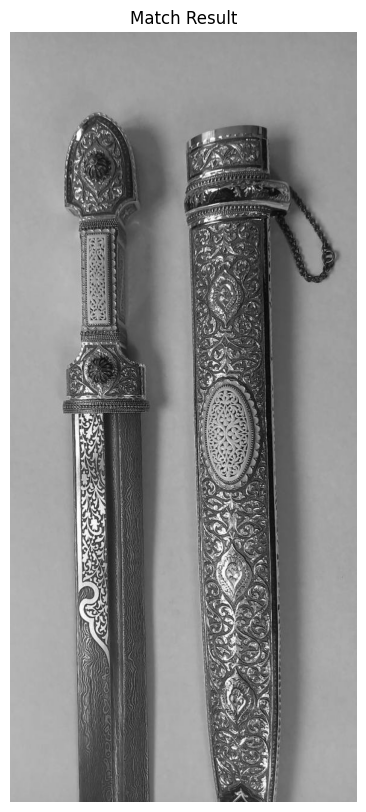

In [30]:
match_and_display('main_photo.jpg', 'traf.jpg', threshold=0.2   )